In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_excel('FinalPE.xlsx')

In [3]:
lstm.sample()

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (Â°C),Total Snow (cm),Total Precip (mm),Min Temp (Â°C),Mean Temp (Â°C),Heat Deg Days (°C),Cool Deg Days (Â°C),Longitude (x),Latitude (y)
391,2018-08-01,Prince Edward Island,23.91375,12.493072,12.949124,14829,Summerside,30.4,1.372727,0.0,18.1,24.3,0.0,6.3,-63.84,46.44


# St. Peters Bay Construction

In [4]:
lstm_Construction_StPeter = lstm[lstm['Station Name'] == 'St. Peters Bay'][['Date', 'Construction']]
lstm_Construction_StPeter.set_index('Date', inplace=True)
lstm_Construction_StPeter.index = pd.to_datetime(lstm_Construction_StPeter.index)

In [5]:
lstm_Construction_StPeter

,Construction
Date,
2013-01-01,1.168543
2013-02-01,1.168257
2013-03-01,1.300350
2013-04-01,1.459499
2013-05-01,1.283861
...,...
2021-08-01,1.417700
2021-09-01,1.487457
2021-10-01,1.599640


In [6]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_Construction_StPeter['Construction'] = scaler.fit_transform(lstm_Construction_StPeter[['Construction']])


In [7]:
lstm_Construction_StPeter['Construction'].head()

Date
2013-01-01    0.231575
2013-02-01    0.231365
2013-03-01    0.328437
2013-04-01    0.445392
2013-05-01    0.316320
Name: Construction, dtype: float64

In [8]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [9]:
sequence_length = 11
X, y = create_sequences(lstm_Construction_StPeter['Construction'].values, sequence_length)


In [10]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [11]:
n_steps =11
n_features =1

In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

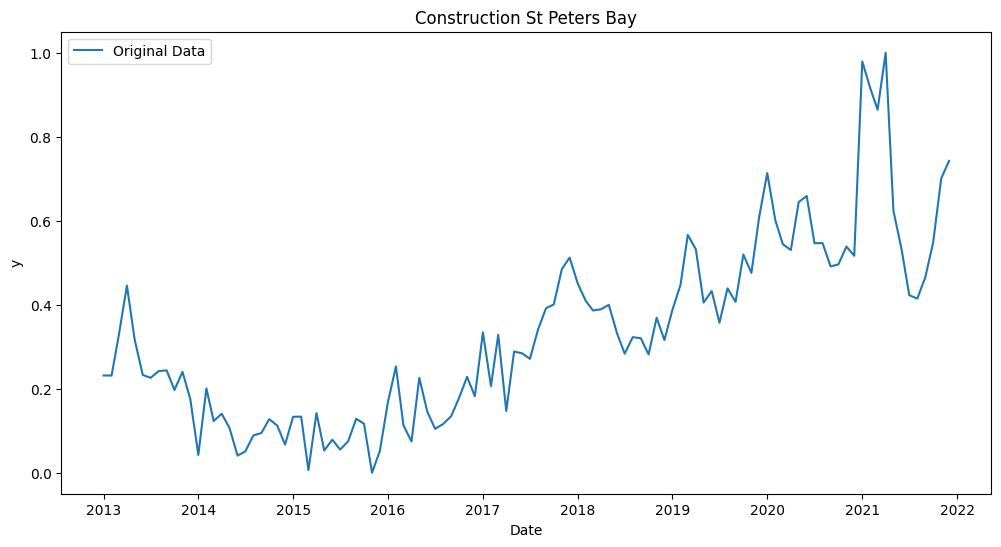

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_Construction_StPeter.index, lstm_Construction_StPeter['Construction'], label='Original Data')
plt.title('Construction St Peters Bay')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
#Scaling the data
scaler = MinMaxScaler()
lstm_Construction_StPeter[['Construction']] = scaler.fit_transform(lstm_Construction_StPeter[['Construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_Construction_StPeter) * 0.8)
train, test = lstm_Construction_StPeter[:train_size], lstm_Construction_StPeter[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Construction'].values, sequence_length)
X_test, y_test = create_sequences(test['Construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


1/1 [==============================] - 0s 58ms/step


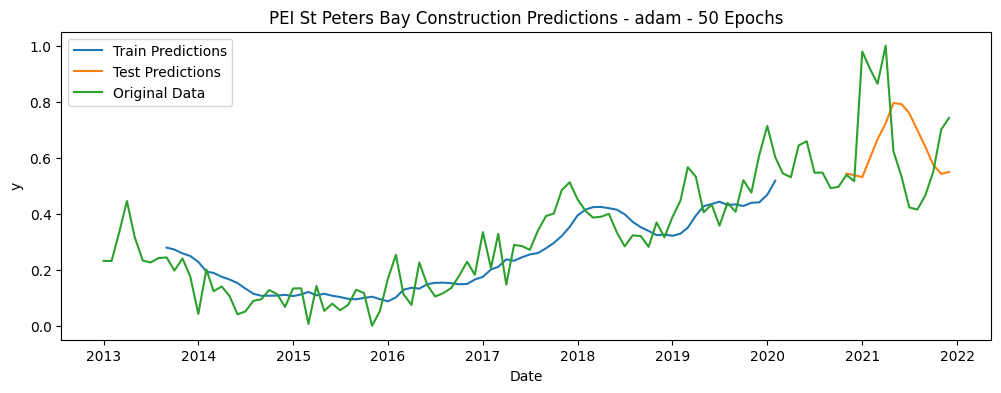

Metrics for adam - 50 Epochs:
Train MSE: 0.04332485949682526
Test MSE: 0.049043820614576315
Train MAE: 0.06415382810742515
Test MAE: 0.2046429312804317
Train RMSE: 0.08302578105228474
Test RMSE: 0.23888457010278633
1/1 [==============================] - 0s 50ms/step


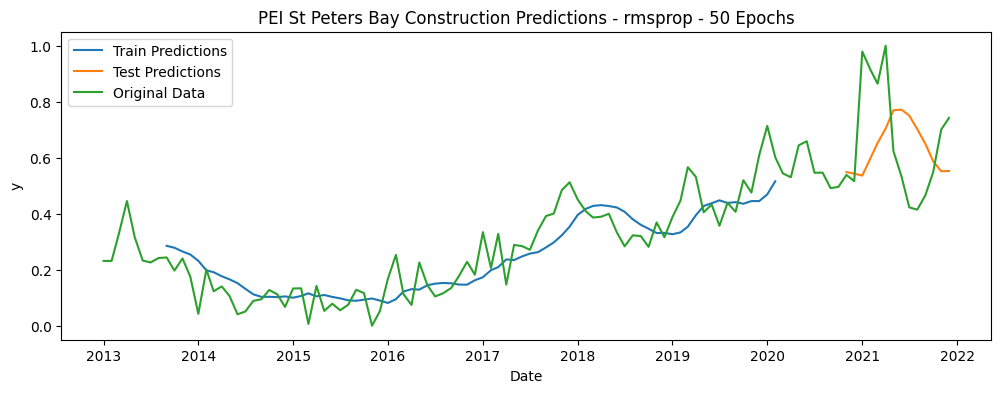

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.044265439774887776
Test MSE: 0.047408891245893627
Train MAE: 0.06469927084803152
Test MAE: 0.20473685968564848
Train RMSE: 0.08322995262471734
Test RMSE: 0.237849063765852
1/1 [==============================] - 0s 39ms/step


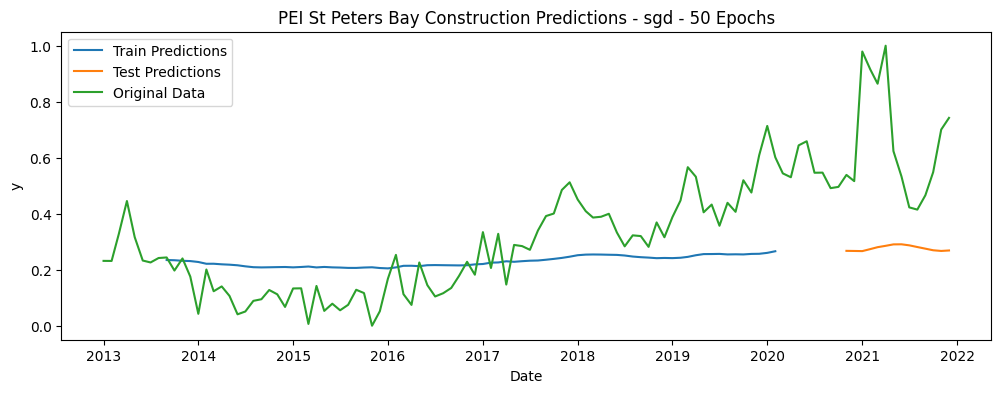

Metrics for sgd - 50 Epochs:
Train MSE: 0.028350048081621667
Test MSE: 0.18798376159218555
Train MAE: 0.12595039227586333
Test MAE: 0.38531243734667253
Train RMSE: 0.1518650271062163
Test RMSE: 0.43415546174253
1/1 [==============================] - 0s 66ms/step


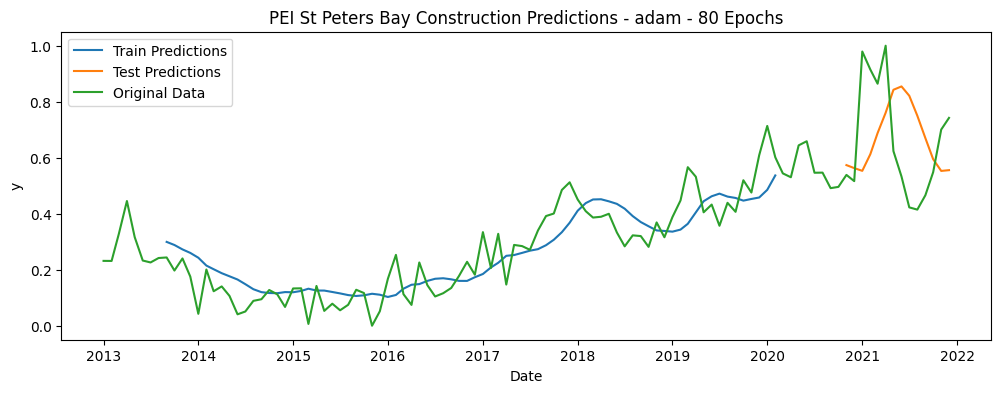

Metrics for adam - 80 Epochs:
Train MSE: 0.04411335572831182
Test MSE: 0.05180217630051335
Train MAE: 0.06699956999478648
Test MAE: 0.22037600727383339
Train RMSE: 0.08324955019409505
Test RMSE: 0.2518665768803177
1/1 [==============================] - 0s 49ms/step


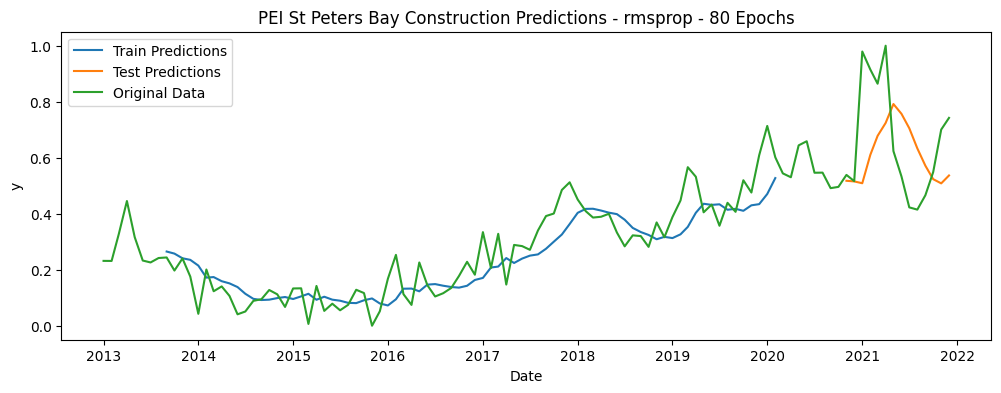

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.04413309996931996
Test MSE: 0.05140374567445157
Train MAE: 0.06105586670566856
Test MAE: 0.19148072522592605
Train RMSE: 0.08090518316868267
Test RMSE: 0.2271516143277569
1/1 [==============================] - 0s 56ms/step


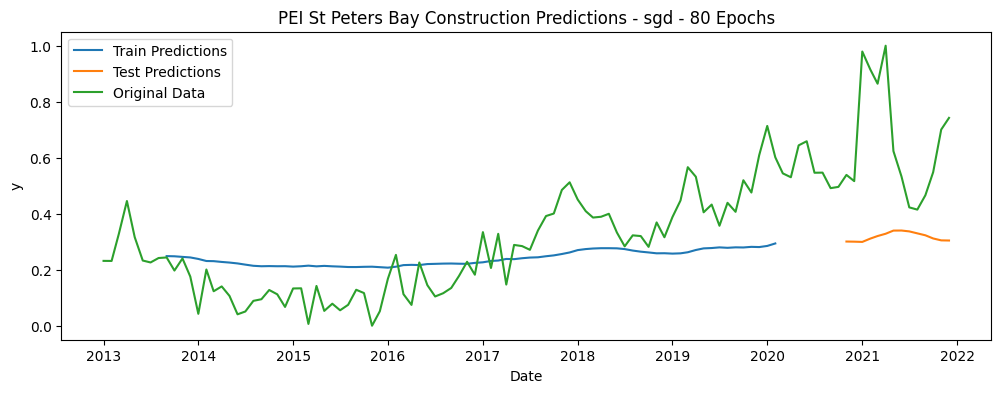

Metrics for sgd - 80 Epochs:
Train MSE: 0.028179022777332363
Test MSE: 0.15790347182166622
Train MAE: 0.11974635807047089
Test MAE: 0.34387472418343296
Train RMSE: 0.1440526343687961
Test RMSE: 0.39950425602431333
1/1 [==============================] - 0s 54ms/step


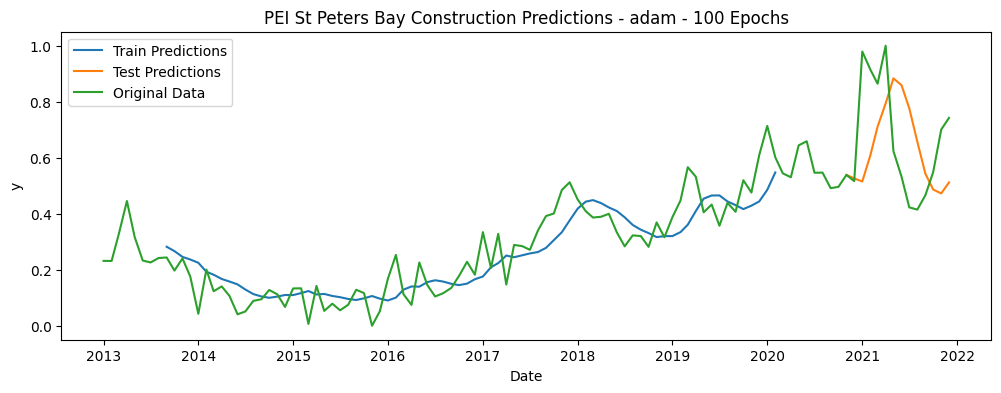

Metrics for adam - 100 Epochs:
Train MSE: 0.04440449102140105
Test MSE: 0.059597913361513204
Train MAE: 0.06286840635827835
Test MAE: 0.20860342834655718
Train RMSE: 0.08008664455547282
Test RMSE: 0.2461886831560648
1/1 [==============================] - 0s 51ms/step


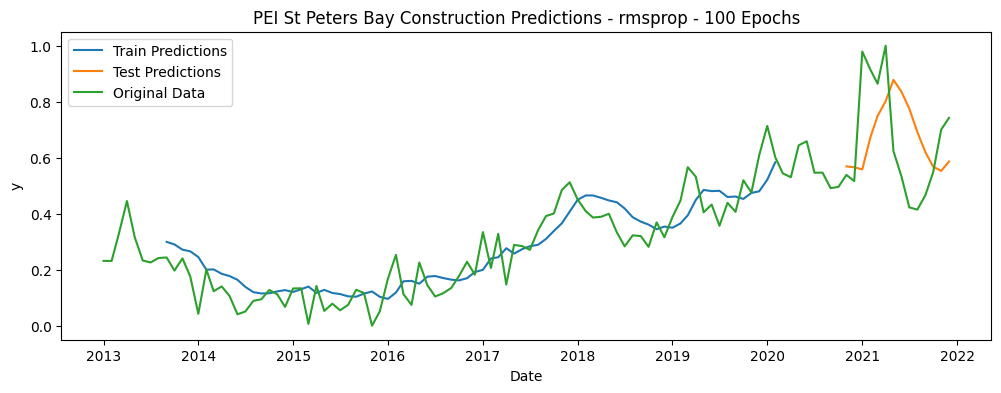

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.04630645587044795
Test MSE: 0.05191853451396492
Train MAE: 0.06402203213736068
Test MAE: 0.19437348099056923
Train RMSE: 0.07833784758453087
Test RMSE: 0.22676921619371979
1/1 [==============================] - 0s 57ms/step


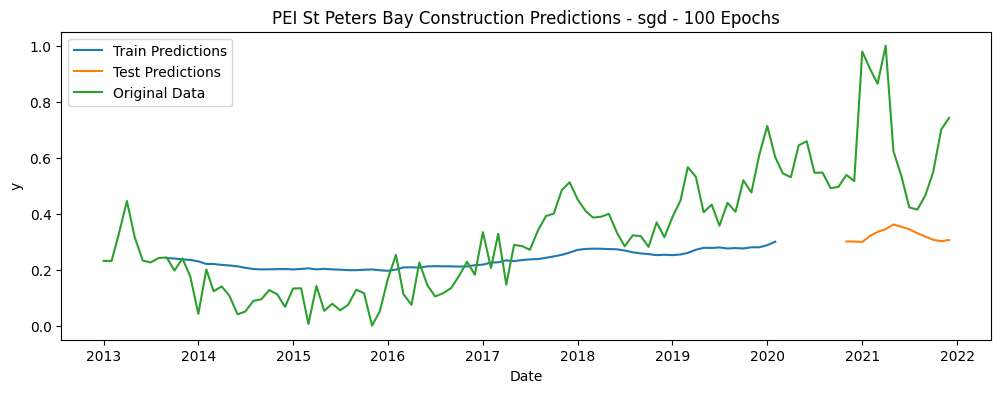

Metrics for sgd - 100 Epochs:
Train MSE: 0.02865359694392945
Test MSE: 0.15444157297134775
Train MAE: 0.11677467711977273
Test MAE: 0.33847649116142436
Train RMSE: 0.14144902193542833
Test RMSE: 0.3936923193118802
1/1 [==============================] - 0s 49ms/step


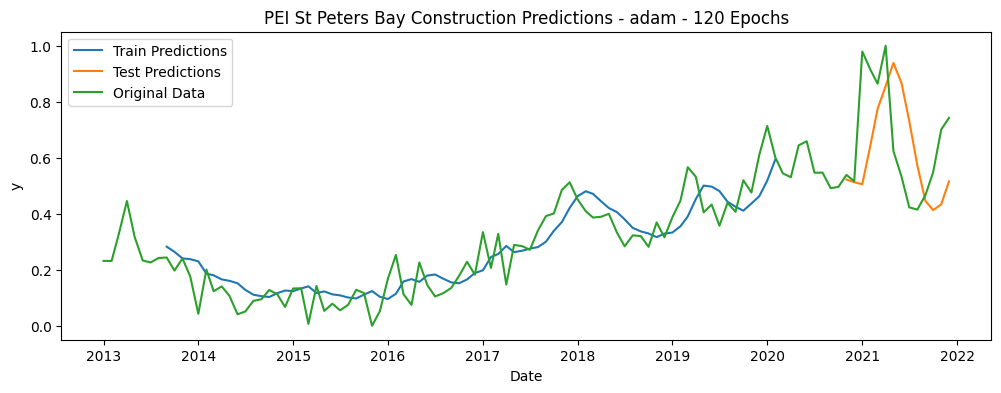

Metrics for adam - 120 Epochs:
Train MSE: 0.045593446300446455
Test MSE: 0.07018255570684749
Train MAE: 0.06029608462307774
Test MAE: 0.19742656964588218
Train RMSE: 0.0757220708495793
Test RMSE: 0.23900846498911268
1/1 [==============================] - 0s 64ms/step


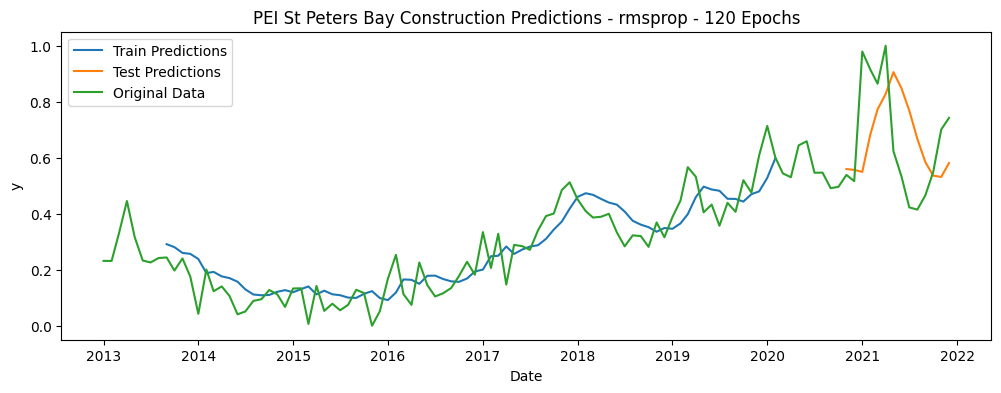

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.046704237070562704
Test MSE: 0.05554385933778016
Train MAE: 0.062211805129434056
Test MAE: 0.18878613778501738
Train RMSE: 0.07615116393039911
Test RMSE: 0.22515605685886797
1/1 [==============================] - 0s 58ms/step


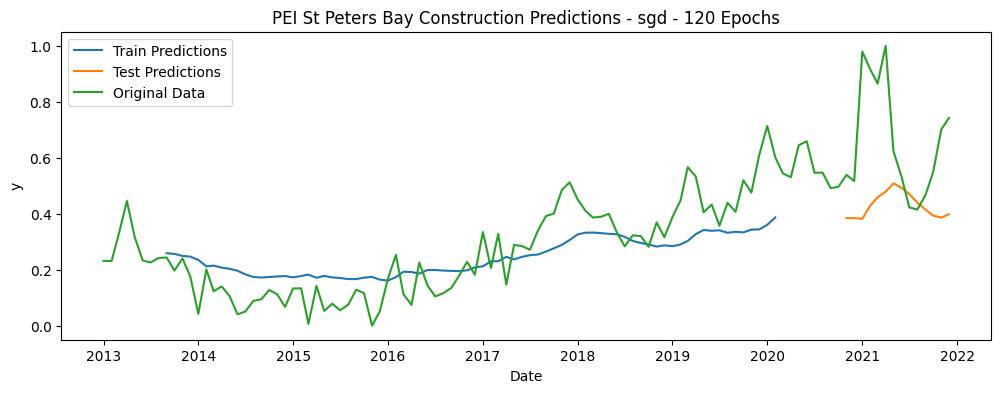

Metrics for sgd - 120 Epochs:
Train MSE: 0.031503341188456546
Test MSE: 0.09499593724131512
Train MAE: 0.09085086868409764
Test MAE: 0.24210279167249274
Train RMSE: 0.11297747479651614
Test RMSE: 0.30850923185979273


In [15]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_Construction_StPeter.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_Construction_StPeter.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_Construction_StPeter.index, lstm_Construction_StPeter['Construction'], label='Original Data')
        plt.title(f'PEI St Peters Bay Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# SummerSide Transportation

In [55]:
lstm_transportation_Eastpoint = lstm[lstm['Station Name'] == 'Summerside'][['Date', 'Transportation']]
lstm_transportation_Eastpoint.set_index('Date', inplace=True)
lstm_transportation_Eastpoint.index = pd.to_datetime(lstm_transportation_Eastpoint.index)

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_Eastpoint['Transportation'] = scaler.fit_transform(lstm_transportation_Eastpoint[['Transportation']])


In [58]:
lstm_transportation_Eastpoint['Transportation'].head()


Date
2013-01-01    0.260704
2013-02-01    0.112016
2013-03-01    0.069127
2013-04-01    0.000000
2013-05-01    0.082954
Name: Transportation, dtype: float64

In [59]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [60]:
sequence_length = 11
X, y = create_sequences(lstm_transportation_Eastpoint['Transportation'].values, sequence_length)


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [62]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [63]:
n_steps =11
n_features =1

In [64]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [65]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

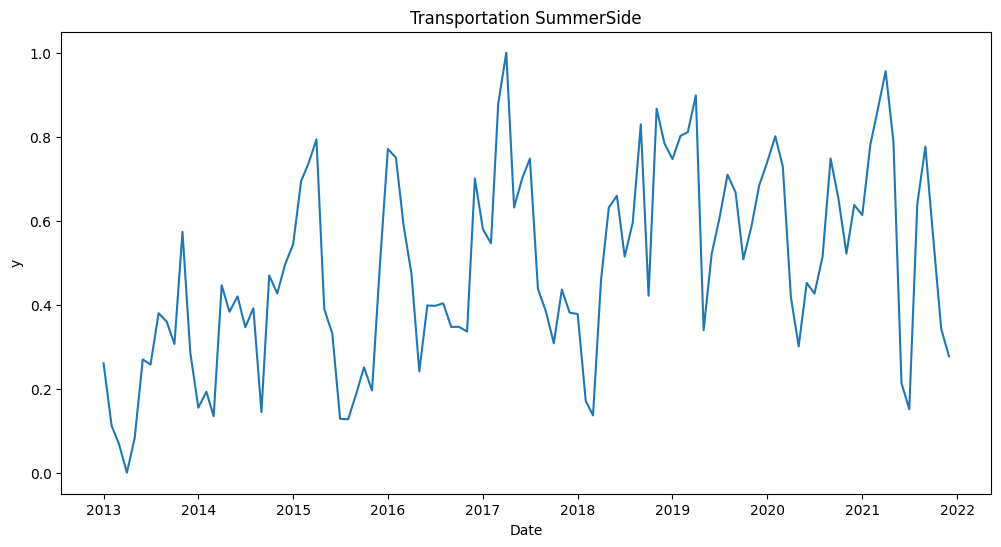

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_Eastpoint.index, lstm_transportation_Eastpoint['Transportation'], label='Original Data')
plt.title('Transportation SummerSide')
plt.xlabel('Date')
plt.ylabel('y')

In [67]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_Eastpoint[['Transportation']] = scaler.fit_transform(lstm_transportation_Eastpoint[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_Eastpoint) * 0.8)
train, test = lstm_transportation_Eastpoint[:train_size], lstm_transportation_Eastpoint[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


1/1 [==============================] - 0s 61ms/step


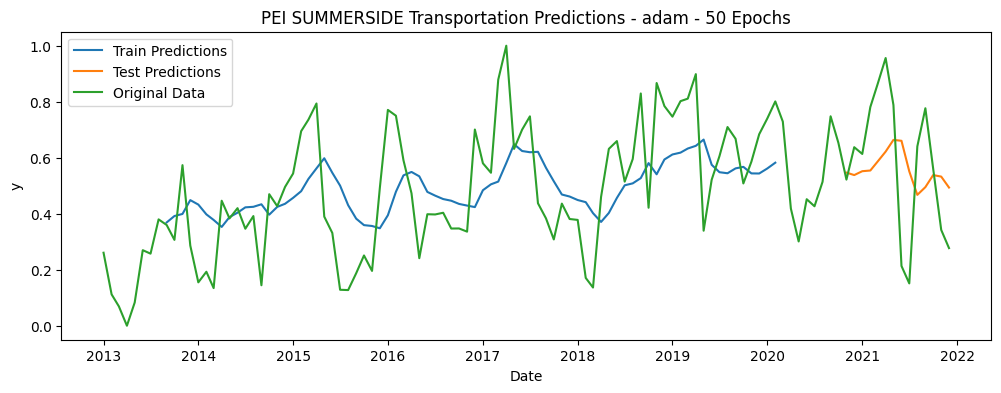

Metrics for adam - 50 Epochs:
Train MSE: 0.05450016908998434
Test MSE: 0.06243779150716798
Train MAE: 0.15655993381779704
Test MAE: 0.2056886054262221
Train RMSE: 0.18691853158259378
Test RMSE: 0.2423429474562508
1/1 [==============================] - 0s 56ms/step


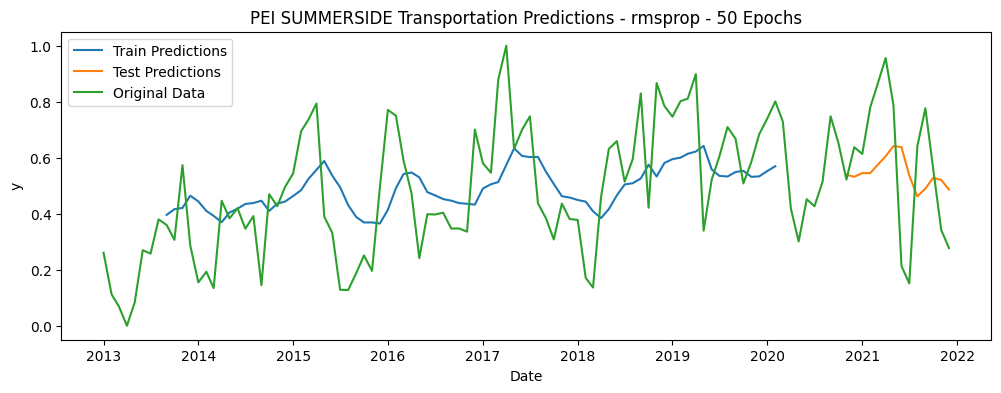

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.05277997462554958
Test MSE: 0.06254019328613852
Train MAE: 0.15770520158365622
Test MAE: 0.20775298888190732
Train RMSE: 0.1878125513381246
Test RMSE: 0.24186577747770982
1/1 [==============================] - 0s 37ms/step


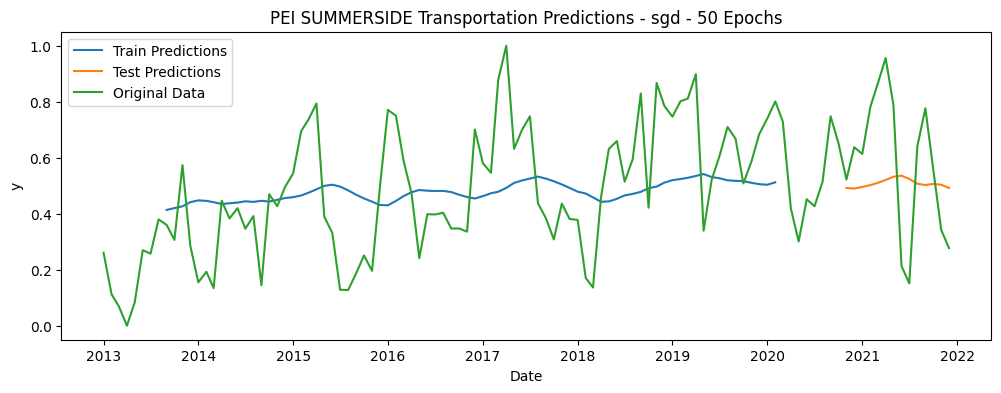

Metrics for sgd - 50 Epochs:
Train MSE: 0.04891481666723578
Test MSE: 0.06412100767370402
Train MAE: 0.175726778629029
Test MAE: 0.22518358372482167
Train RMSE: 0.2095859831937654
Test RMSE: 0.2542917189017191
1/1 [==============================] - 0s 57ms/step


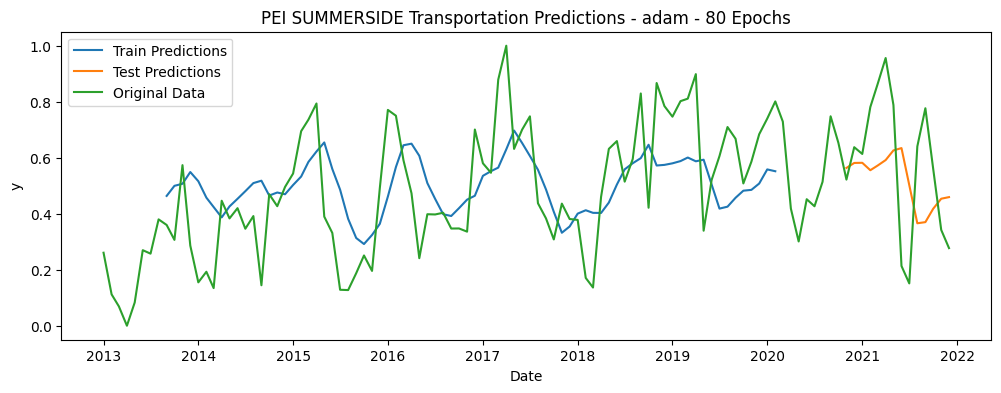

Metrics for adam - 80 Epochs:
Train MSE: 0.055508814418713304
Test MSE: 0.07011453625571538
Train MAE: 0.15578027869585864
Test MAE: 0.21875736231311307
Train RMSE: 0.18740396628782974
Test RMSE: 0.2546532856827517
1/1 [==============================] - 0s 45ms/step


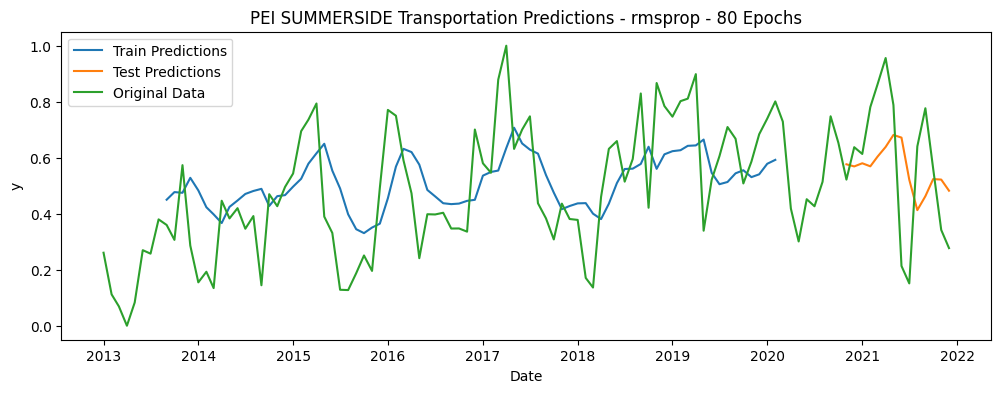

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.05519344523801952
Test MSE: 0.06475456314095022
Train MAE: 0.1520735477165779
Test MAE: 0.2031124394605969
Train RMSE: 0.18062128333799046
Test RMSE: 0.23996431234058543
1/1 [==============================] - 0s 58ms/step


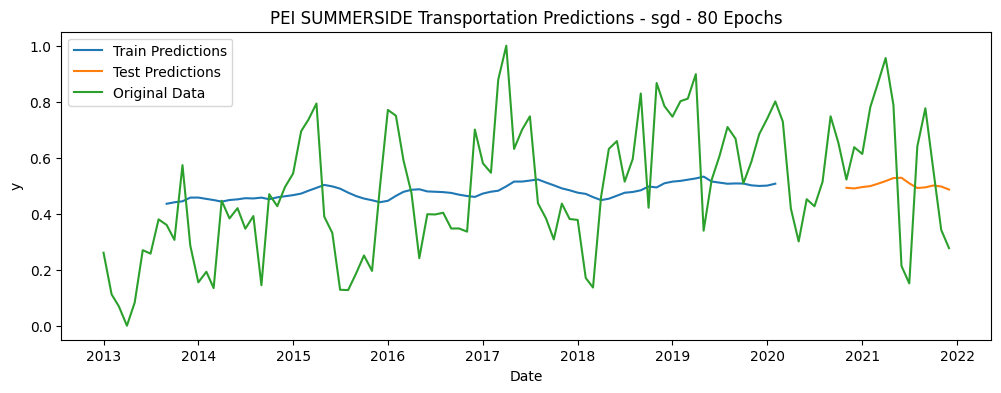

Metrics for sgd - 80 Epochs:
Train MSE: 0.04840054027466284
Test MSE: 0.06493075173342798
Train MAE: 0.17507895632770107
Test MAE: 0.22580051734309473
Train RMSE: 0.20895744403258748
Test RMSE: 0.25416456061228543
1/1 [==============================] - 0s 66ms/step


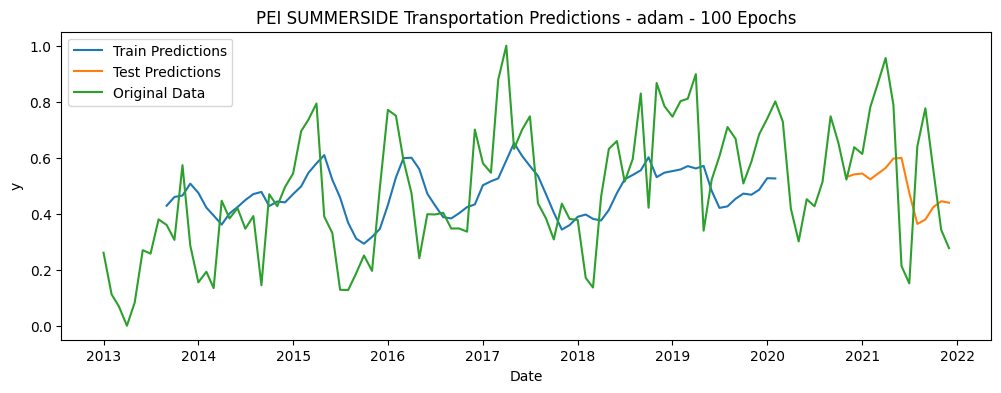

Metrics for adam - 100 Epochs:
Train MSE: 0.054511862243281015
Test MSE: 0.07103305057987297
Train MAE: 0.1563366300321106
Test MAE: 0.22319849162290353
Train RMSE: 0.18842743864980227
Test RMSE: 0.2561242970256485
1/1 [==============================] - 0s 42ms/step


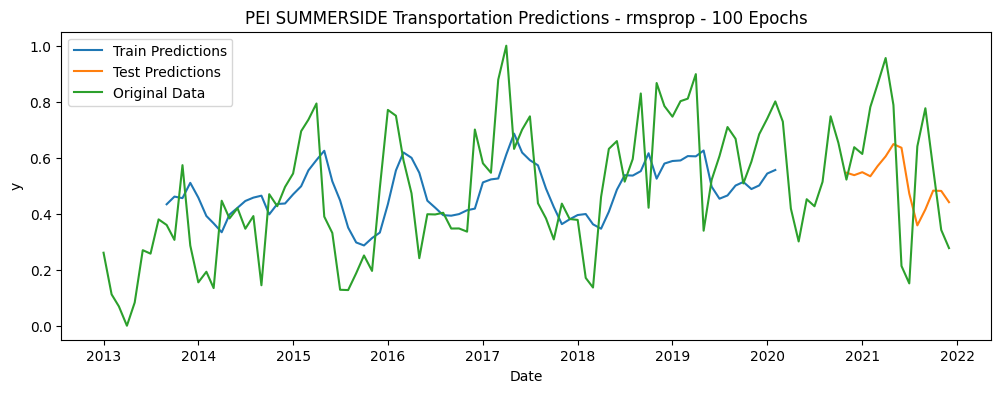

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.056066881039021785
Test MSE: 0.06882245522746877
Train MAE: 0.15045629688699164
Test MAE: 0.21343779039230945
Train RMSE: 0.18093119341273053
Test RMSE: 0.24611171537511445
1/1 [==============================] - 0s 51ms/step


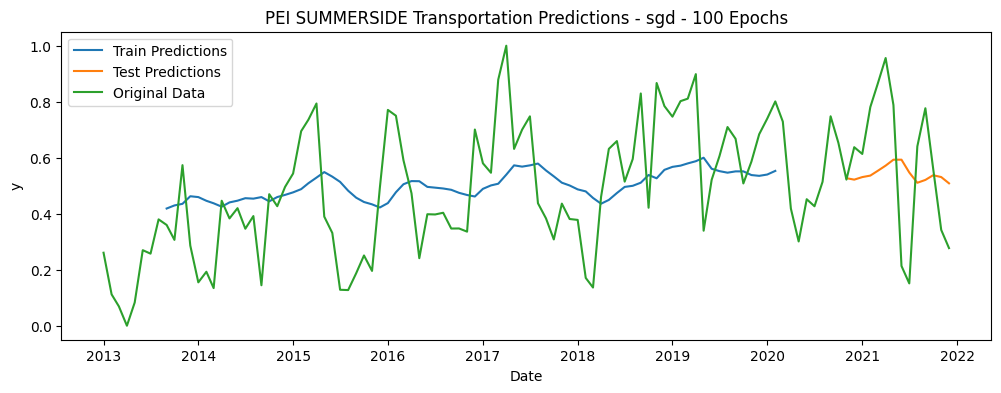

Metrics for sgd - 100 Epochs:
Train MSE: 0.049610331611264456
Test MSE: 0.060916090301963675
Train MAE: 0.16901832132720448
Test MAE: 0.21020726760644148
Train RMSE: 0.19946745472176325
Test RMSE: 0.24423554071945028
1/1 [==============================] - 0s 72ms/step


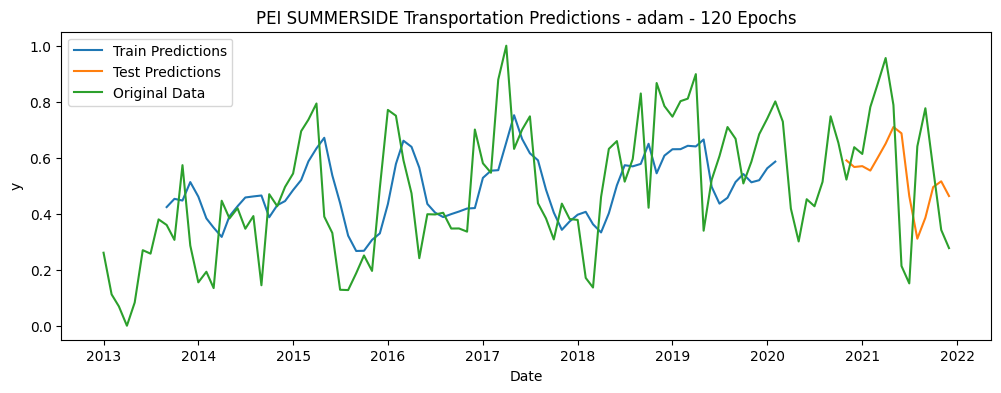

Metrics for adam - 120 Epochs:
Train MSE: 0.05956680972579715
Test MSE: 0.07185603584502379
Train MAE: 0.14611253307542277
Test MAE: 0.21349298003589684
Train RMSE: 0.1758142685037581
Test RMSE: 0.25133355591412676
1/1 [==============================] - 0s 49ms/step


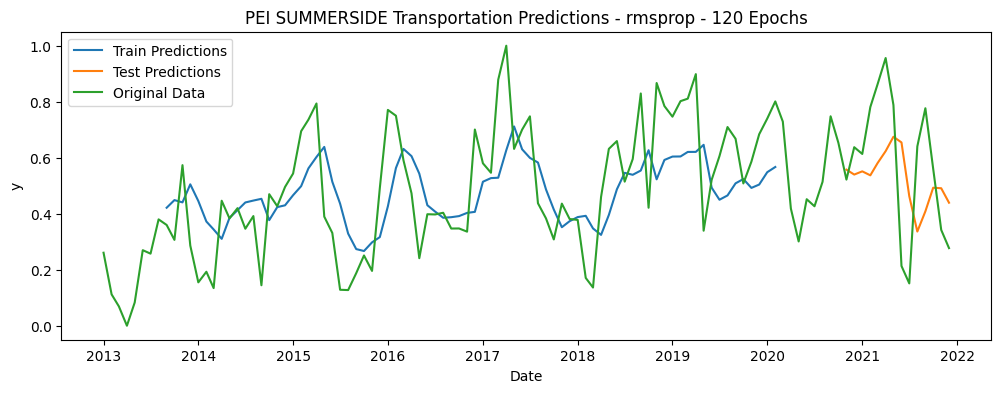

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.05829041115207093
Test MSE: 0.07011367528314592
Train MAE: 0.14787187146823447
Test MAE: 0.21219937191538726
Train RMSE: 0.17810938240696847
Test RMSE: 0.24635604032890396
1/1 [==============================] - 0s 48ms/step


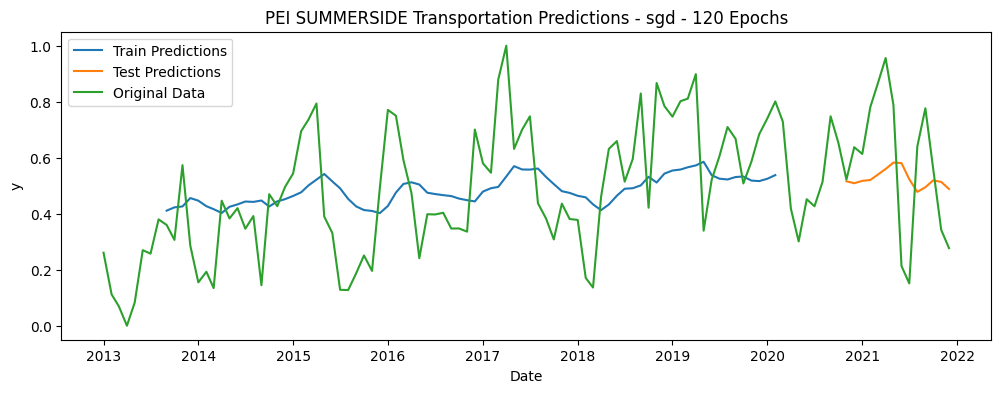

Metrics for sgd - 120 Epochs:
Train MSE: 0.05000220502938908
Test MSE: 0.06276205995324537
Train MAE: 0.1664999203952348
Test MAE: 0.21608702724863735
Train RMSE: 0.19722842157160808
Test RMSE: 0.24682225992643578


In [68]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_Eastpoint.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_Eastpoint.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_Eastpoint.index, lstm_transportation_Eastpoint['Transportation'], label='Original Data')
        plt.title(f'PEI SUMMERSIDE Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# East Point Agriculture

In [69]:
lstm_agriculture_Eastpoint = lstm[lstm['Station Name'] == 'East Point'][['Date', 'Agriculture']]
lstm_agriculture_Eastpoint.set_index('Date', inplace=True)
lstm_agriculture_Eastpoint.index = pd.to_datetime(lstm_agriculture_Eastpoint.index)

In [70]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [71]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_Eastpoint['Agriculture'].values, sequence_length)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [73]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [74]:
n_steps =11
n_features =1

In [75]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [76]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

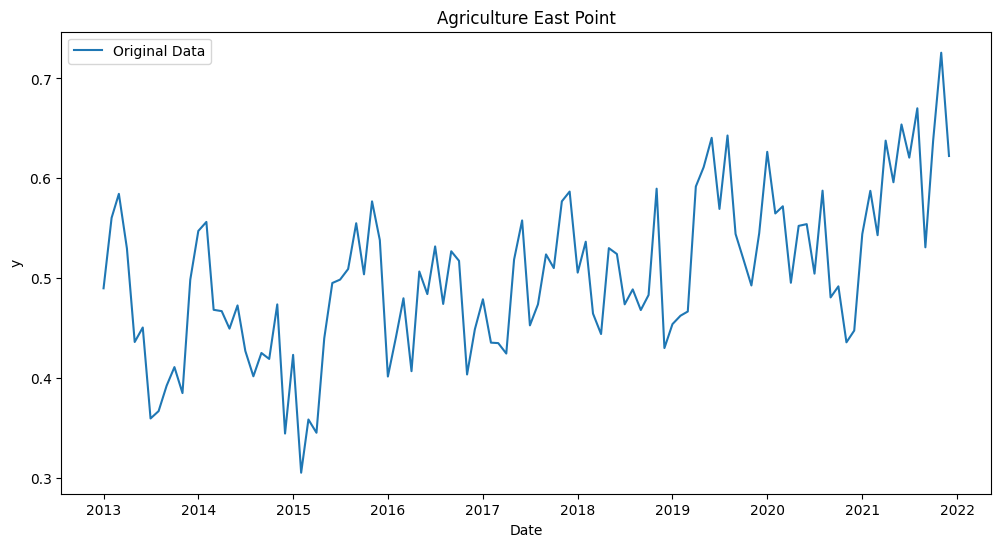

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_Eastpoint.index, lstm_agriculture_Eastpoint['Agriculture'], label='Original Data')
plt.title('Agriculture East Point')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [78]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_Eastpoint[['Agriculture']] = scaler.fit_transform(lstm_agriculture_Eastpoint[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_Eastpoint) * 0.8)
train, test = lstm_agriculture_Eastpoint[:train_size], lstm_agriculture_Eastpoint[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

1/1 [==============================] - 0s 71ms/step


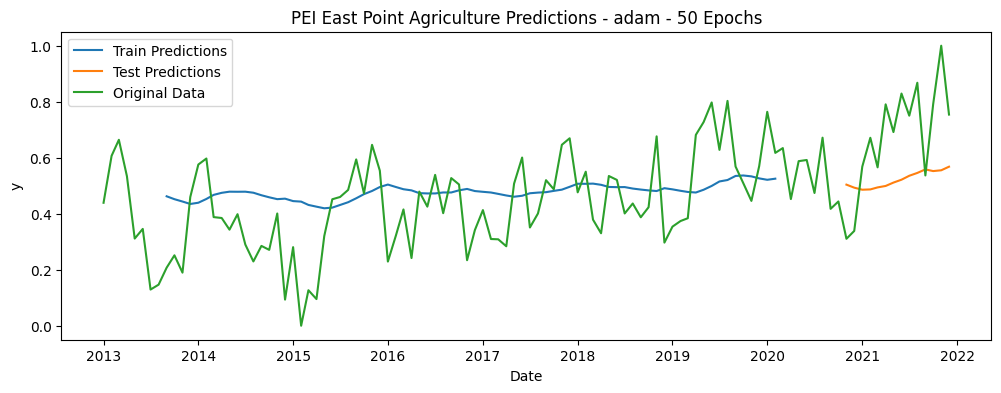

Metrics for adam - 50 Epochs:
Train MSE: 0.02991974252987503
Test MSE: 0.05980873688862462
Train MAE: 0.132341355172703
Test MAE: 0.20672641088525126
Train RMSE: 0.1619054388838986
Test RMSE: 0.23288436183938696
1/1 [==============================] - 0s 52ms/step


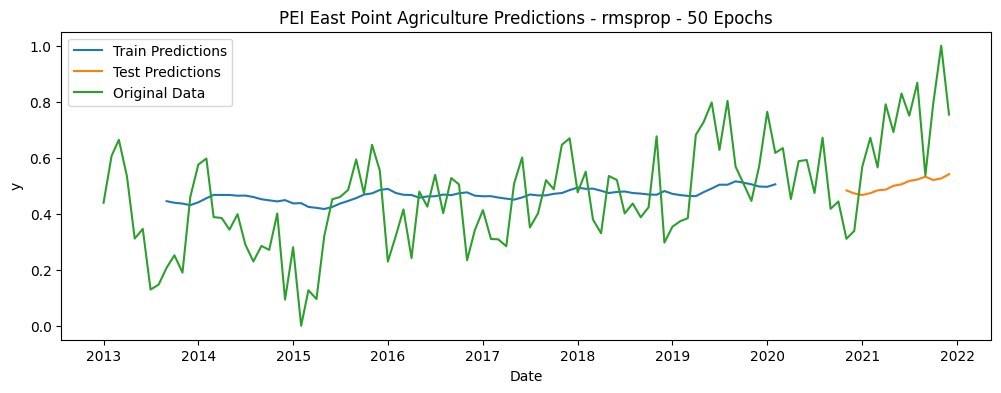

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.028717802350436954
Test MSE: 0.0661428629579008
Train MAE: 0.12927836264882495
Test MAE: 0.21779849775521293
Train RMSE: 0.1587557304142909
Test RMSE: 0.24722343360099375
1/1 [==============================] - 0s 65ms/step


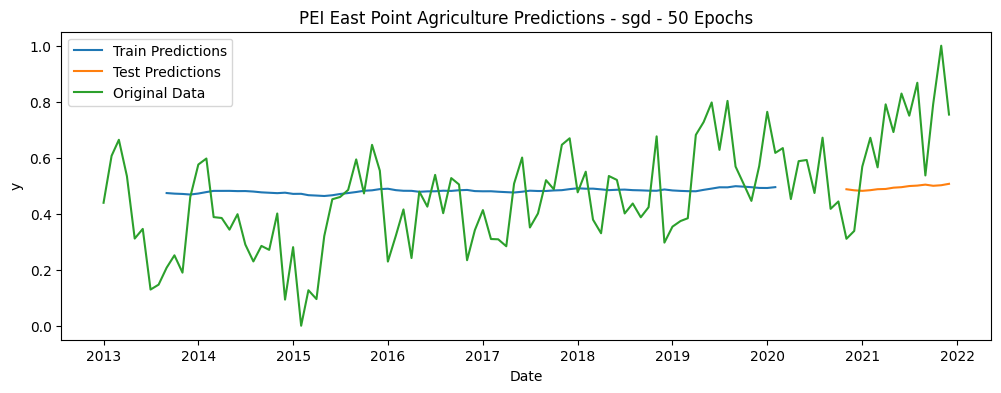

Metrics for sgd - 50 Epochs:
Train MSE: 0.02961102378212252
Test MSE: 0.06862607573708979
Train MAE: 0.13551205125109592
Test MAE: 0.2283825647763104
Train RMSE: 0.16843532189798938
Test RMSE: 0.25871205872184705
1/1 [==============================] - 0s 74ms/step


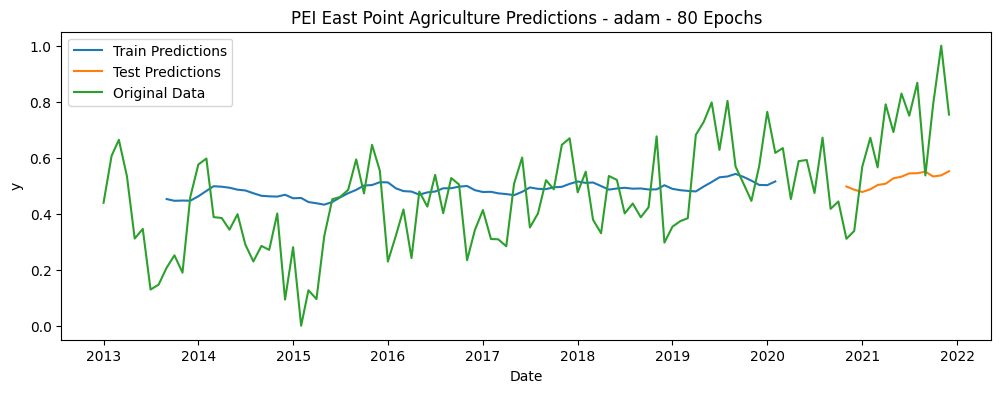

Metrics for adam - 80 Epochs:
Train MSE: 0.03048923335873014
Test MSE: 0.060361201704322576
Train MAE: 0.1317465372772514
Test MAE: 0.20596644102067846
Train RMSE: 0.1626951614057892
Test RMSE: 0.2341263660360332
1/1 [==============================] - 0s 64ms/step


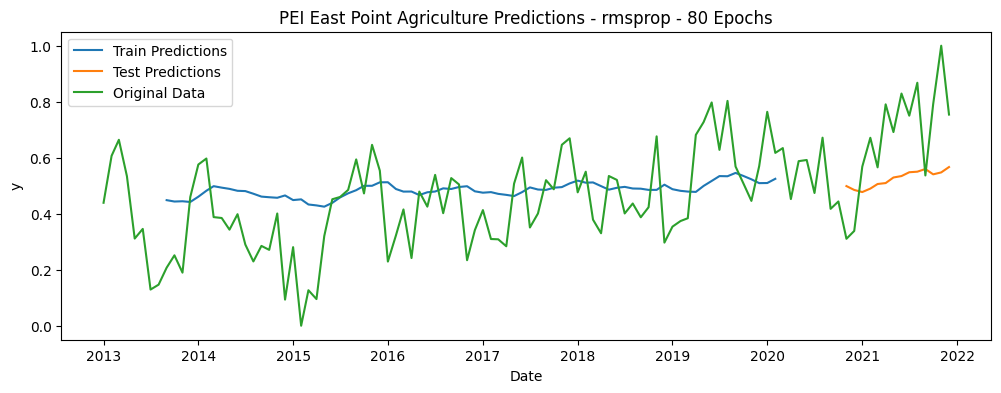

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.030503848168121968
Test MSE: 0.05909354935813171
Train MAE: 0.13049753035176634
Test MAE: 0.20267735667131867
Train RMSE: 0.16095667932532629
Test RMSE: 0.22969616913300506
1/1 [==============================] - 0s 56ms/step


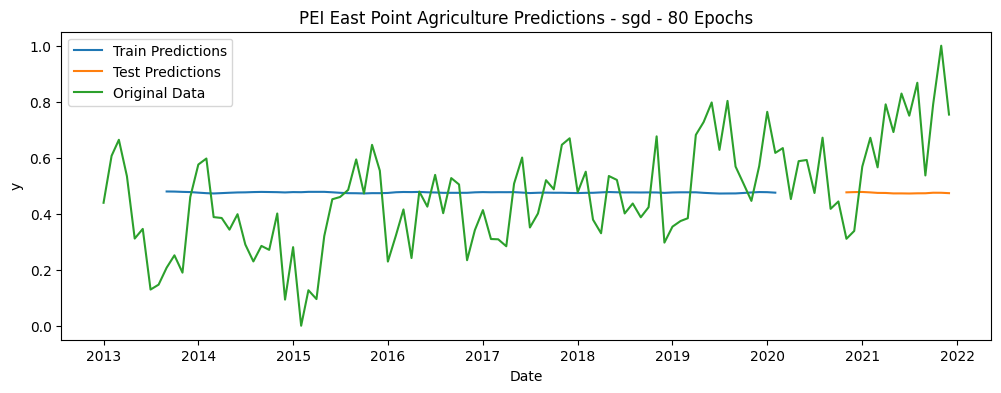

Metrics for sgd - 80 Epochs:
Train MSE: 0.02902444327763036
Test MSE: 0.07595688594922408
Train MAE: 0.13759157014878373
Test MAE: 0.24514330360892037
Train RMSE: 0.17119278573976093
Test RMSE: 0.2762536094408932
1/1 [==============================] - 0s 67ms/step


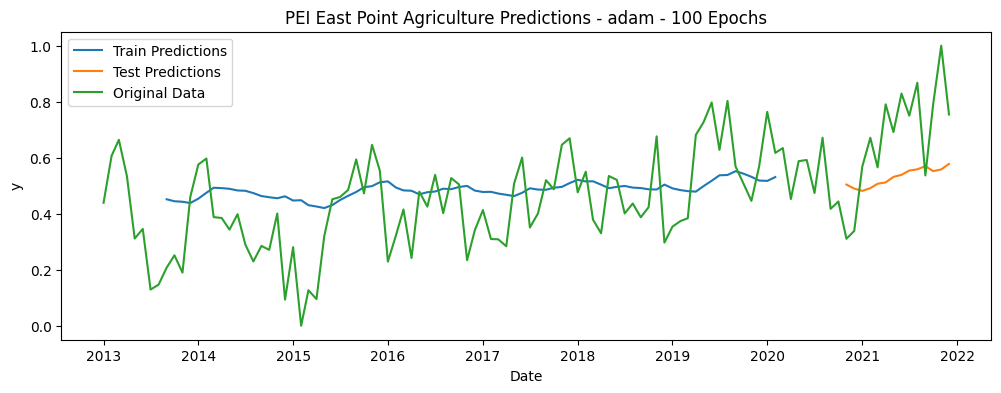

Metrics for adam - 100 Epochs:
Train MSE: 0.0306911031868496
Test MSE: 0.0574736084891499
Train MAE: 0.13101581642711382
Test MAE: 0.19961067215277706
Train RMSE: 0.160991108614499
Test RMSE: 0.2251532337269477
1/1 [==============================] - 0s 67ms/step


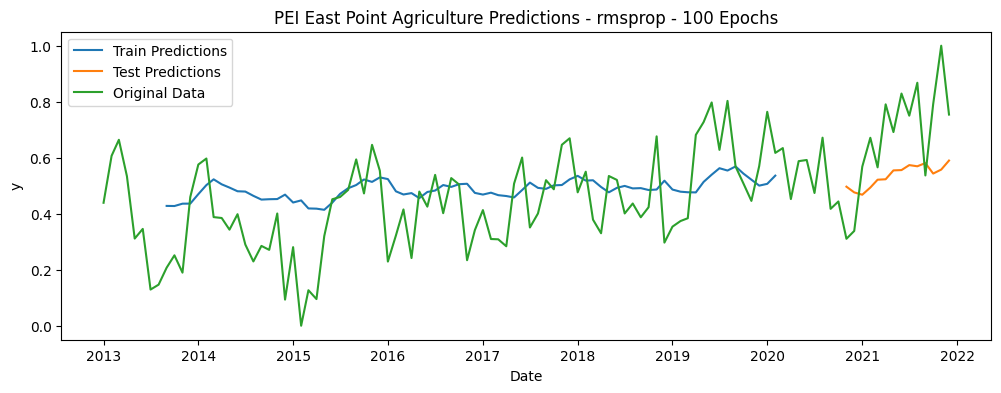

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.031328237157040084
Test MSE: 0.05640322139376635
Train MAE: 0.1277486259287313
Test MAE: 0.19265956996412176
Train RMSE: 0.157683735653811
Test RMSE: 0.21850758141479848
1/1 [==============================] - 0s 56ms/step


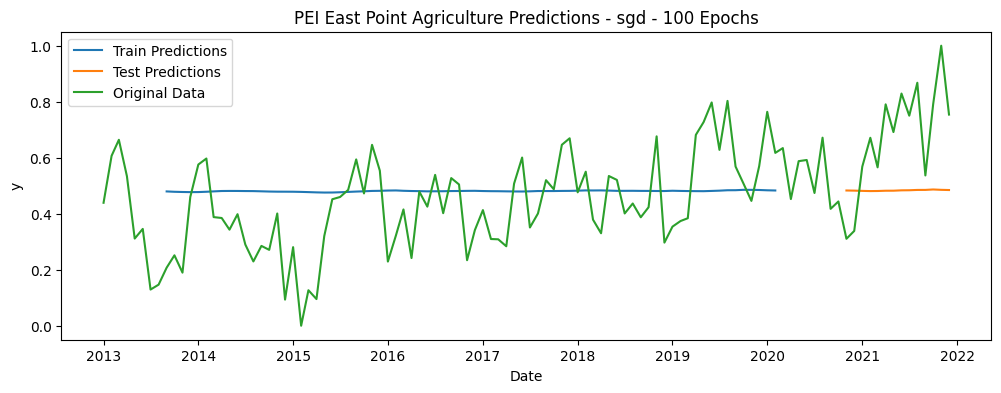

Metrics for sgd - 100 Epochs:
Train MSE: 0.029496542765512616
Test MSE: 0.07244529155415567
Train MAE: 0.1375929648884895
Test MAE: 0.23792819328991904
Train RMSE: 0.17102484709624155
Test RMSE: 0.2686360839999544
1/1 [==============================] - 0s 64ms/step


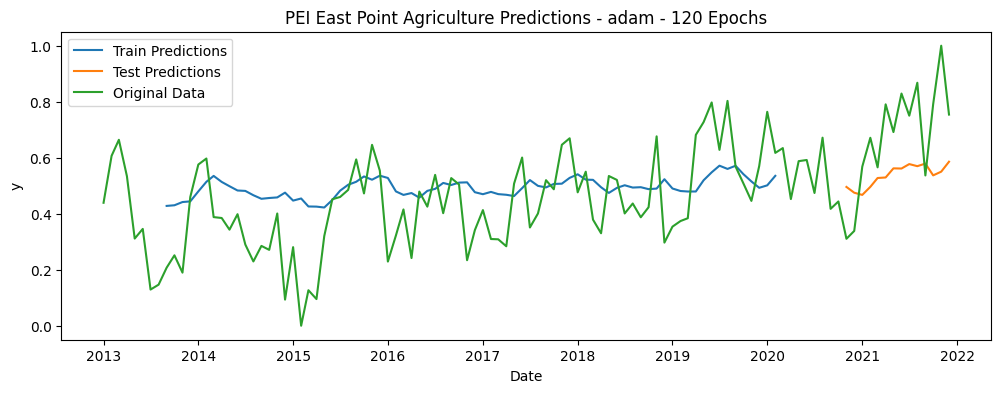

Metrics for adam - 120 Epochs:
Train MSE: 0.03185656259849577
Test MSE: 0.056203976450718736
Train MAE: 0.12890999377610057
Test MAE: 0.19143592705289195
Train RMSE: 0.15932840710366575
Test RMSE: 0.2183947926705208
1/1 [==============================] - 0s 57ms/step


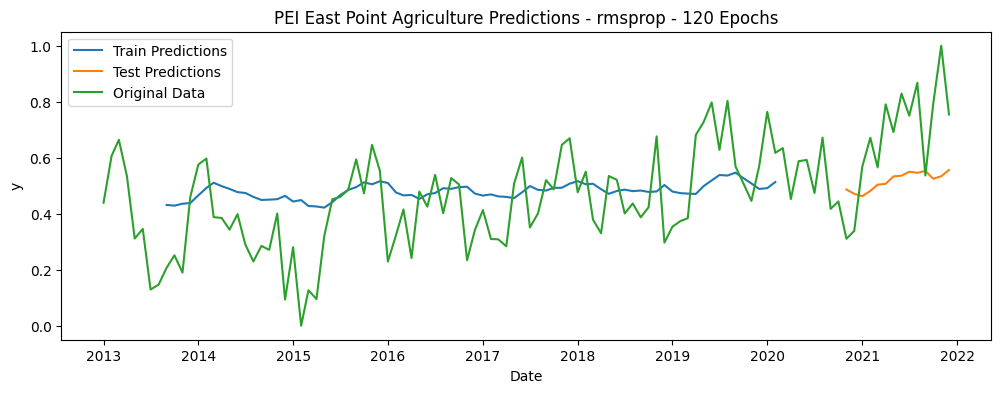

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.030161458477403594
Test MSE: 0.06139378984365746
Train MAE: 0.1280630845865718
Test MAE: 0.20497026007759808
Train RMSE: 0.15824917311754114
Test RMSE: 0.23336626887202055
1/1 [==============================] - 0s 76ms/step


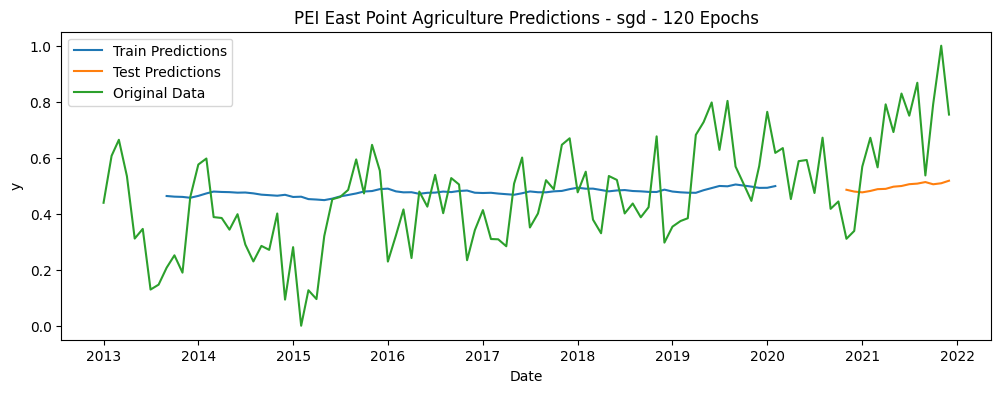

Metrics for sgd - 120 Epochs:
Train MSE: 0.029271090502552458
Test MSE: 0.06768821222819177
Train MAE: 0.1327744624212155
Test MAE: 0.2246035494055327
Train RMSE: 0.1649712341736836
Test RMSE: 0.25470804820437226


In [79]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_Eastpoint.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_Eastpoint.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_Eastpoint.index, lstm_agriculture_Eastpoint['Agriculture'], label='Original Data')
        plt.title(f'PEI East Point Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')